In [ ]:
import numpy as np

eval_data_original = np.load("/content/drive/MyDrive/Colab Notebooks/eval_data_complete.npy")
eval_label_original = np.load("/content/drive/MyDrive/Colab Notebooks/eval_label_complete.npy")

In [ ]:
eval_data = eval_data_original[10:-50]
eval_label = eval_label_original[10:-50]

test_data = np.concatenate((eval_data_original[:10], eval_data_original[-50:]))
test_label = np.concatenate((eval_label_original[:10], eval_label_original[-50:]))

eval_data_original = 0
eval_label_original = 0

In [ ]:
eval_data = np.concatenate((eval_data[:337], eval_data[:337], eval_data[:337], eval_data[:337], eval_data))
eval_label = np.concatenate((eval_label[:337], eval_label[:337], eval_label[:337], eval_label[:337], eval_label))
print(eval_data.shape)
print(eval_label.shape)

(3483, 22, 15000)
(3483,)


In [ ]:
idx = np.random.permutation(len(eval_data))
eval_data,eval_label = eval_data[idx], eval_label[idx]
idx = 0

In [ ]:
from tensorflow.keras.utils import to_categorical

enc_labels = to_categorical(eval_label, num_classes=2)              
test_label = to_categorical(test_label, num_classes=2)     
eval_label= enc_labels
enc_labels = 0
print(eval_data.shape)
print(eval_label.shape)
print(eval_data.dtype)
print(eval_label.dtype)
print('training labels have been loaded')

bs,t,f = eval_data.shape

(3483, 22, 15000)
(3483, 2)
float32
float32
training labels have been loaded


In [ ]:
from pdb import set_trace
#import mne
import pandas as pd
import numpy as np
import math
import os
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,LSTM, Dense, Activation, Bidirectional
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPooling3D
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping


# ----------------------DEEP-NET Testing-----------------------
from tensorflow.keras.layers import Input,Dense,concatenate,Flatten,GRU,Conv1D,Conv2D
from tensorflow.keras.models import Model

inputsin= Input(shape=(t,f))


# ------------------First Inception
deep_net = Conv1D(25, 10, strides=1, activation='relu',padding="causal")(inputsin)
deep_net = MaxPooling1D(3, 3, padding="same")(deep_net)

deep_net = Conv1D(50, 10, activation='relu', padding='causal')(deep_net)
deep_net = MaxPooling1D(3, 3, padding='same')(deep_net)

deep_net = Conv1D(100, 10, activation='relu', padding='causal')(deep_net)
deep_net = MaxPooling1D(3, 3, padding='same')(deep_net)

deep_net = Conv1D(200, 10, activation='relu', padding='causal')(deep_net)
deep_net = MaxPooling1D(3, 3, padding='same')(deep_net)

deep_net = Flatten()(deep_net)
predictions = Dense(2,activation='softmax')(deep_net)


deep_model = Model(inputs=inputsin, outputs=predictions)

# learning rate to 0.00001
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

deep_model.compile(optimizer = adam_optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
print(deep_model.metrics_names)
print(deep_model.summary())

# early stopping
es = EarlyStopping(monitor='val_loss', min_delta=0.01, mode='min', verbose=1, patience=25)                                # patience
mc = ModelCheckpoint('deep_model3flipped_acc.hdf5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)        # filepath (save model as)
mces = ModelCheckpoint('deep_model3flipped_loss.hdf5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)    # filepath (save model as)

# fit model
# hist=deep_model.fit(eval_data,eval_label,validation_split=0.1, epochs=20,batch_size=64,verbose=1,callbacks=[es, mc,mces],shuffle=False) #epochs #split #



print('The End')

[]
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 22, 15000)]       0         
_________________________________________________________________
conv1d (Conv1D)              (None, 22, 25)            3750025   
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 25)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 50)             12550     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 50)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3, 100)            50100     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 100)            0  

In [ ]:
hist=deep_model.fit(eval_data,eval_label,validation_data=((test_data, test_label)),epochs=20,batch_size=32,verbose=1,callbacks=[mc,mces],shuffle=False) #epochs #split #


Epoch 1/20
109/109 [==============================] - 76s 691ms/step - loss: 0.6882 - accuracy: 0.6070 - val_loss: 0.6907 - val_accuracy: 0.6333

Epoch 00001: val_loss improved from inf to 0.69070, saving model to deep_model3flipped_loss.hdf5
Epoch 2/20
109/109 [==============================] - 74s 678ms/step - loss: 0.6523 - accuracy: 0.9545 - val_loss: 0.6800 - val_accuracy: 0.7667

Epoch 00002: val_loss improved from 0.69070 to 0.68002, saving model to deep_model3flipped_loss.hdf5
Epoch 3/20
109/109 [==============================] - 75s 687ms/step - loss: 0.5833 - accuracy: 0.9983 - val_loss: 0.6406 - val_accuracy: 0.8333

Epoch 00003: val_loss improved from 0.68002 to 0.64056, saving model to deep_model3flipped_loss.hdf5
Epoch 4/20
109/109 [==============================] - 75s 688ms/step - loss: 0.4544 - accuracy: 1.0000 - val_loss: 0.5723 - val_accuracy: 0.8333

Epoch 00004: val_loss improved from 0.64056 to 0.57234, saving model to deep_model3flipped_loss.hdf5
Epoch 5/20
109/1

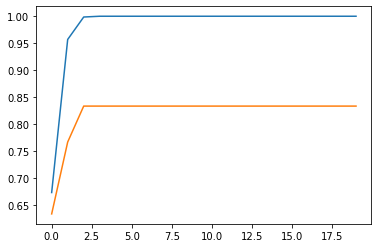

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [ ]:
      
test_label = to_categorical(test_label, num_classes=2)     

# 8-bit full integer quantization

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(deep_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp0dbsgnld/assets


In [ ]:
import pathlib

tflite_models_dir = pathlib.Path("")
#tflite_models_dir.mkdir(exist_ok=True, parents=True)
'''
# Save the unquantized/float model:
tflite_model_file = tflite_models_dir/"mnist_model.tflite"
tflite_model_file.write_bytes(tflite_model)
'''
# Save the quantized model:
tflite_model_quant_file = tflite_models_dir/"model_quant.tflite"
tflite_model_quant_file.write_bytes(tflite_quant_model)

4032160

In [ ]:
tflite_interpreter = tf.lite.Interpreter('model_quant.tflite')

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()


#tflite_interpreter.resize_tensor_input(input_details[0]['index'], (60, 22, 15000))
#tflite_interpreter.resize_tensor_input(output_details[0]['index'], (60, 2))
tflite_interpreter.allocate_tensors()


predictions = []
for data in test_data:
  tflite_interpreter.set_tensor(input_details[0]['index'], [data])

  tflite_interpreter.invoke()

  tflite_model_predictions = tflite_interpreter.get_tensor(output_details[0]['index'])
  print("Prediction results shape:", tflite_model_predictions.shape)
  predictions.append(tflite_model_predictions)

Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction

In [ ]:
count = 0
for i in range(len(predictions)):
  if (predictions[i][0][0] > predictions[i][0][1]) and (test_label[i][0] == 1):
    count += 1
  elif (predictions[i][0][0] < predictions[i][0][1]) and (test_label[i][1] == 1):
    count += 1
print(f'total correct predictions = {count}')
print(f'accuracy = {count/60}')

total correct predictions = 50
accuracy = 0.8333333333333334


# 16-bit float quantization

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(deep_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_quant_model_f = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpp7lf25kz/assets


INFO:tensorflow:Assets written to: /tmp/tmpp7lf25kz/assets


In [ ]:
import pathlib

tflite_models_dir = pathlib.Path("")
#tflite_models_dir.mkdir(exist_ok=True, parents=True)
'''
# Save the unquantized/float model:
tflite_model_file = tflite_models_dir/"mnist_model.tflite"
tflite_model_file.write_bytes(tflite_model)
'''
# Save the quantized model:
tflite_model_quant_file = tflite_models_dir/"model_quant_f.tflite"
tflite_model_quant_file.write_bytes(tflite_quant_model_f)

8036656

In [ ]:
tflite_interpreter = tf.lite.Interpreter('model_quant_f.tflite')

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()


#tflite_interpreter.resize_tensor_input(input_details[0]['index'], (60, 22, 15000))
#tflite_interpreter.resize_tensor_input(output_details[0]['index'], (60, 2))
tflite_interpreter.allocate_tensors()


predictions = []
for data in test_data:
  tflite_interpreter.set_tensor(input_details[0]['index'], [data])

  tflite_interpreter.invoke()

  tflite_model_predictions = tflite_interpreter.get_tensor(output_details[0]['index'])
  print("Prediction results shape:", tflite_model_predictions.shape)
  predictions.append(tflite_model_predictions)

Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction results shape: (1, 2)
Prediction

In [ ]:
count = 0
for i in range(len(predictions)):
  if (predictions[i][0][0] > predictions[i][0][1]) and (test_label[i][0] == 1):
    count += 1
  elif (predictions[i][0][0] < predictions[i][0][1]) and (test_label[i][1] == 1):
    count += 1
print(f'total correct predictions = {count}')
print(f'accuracy = {count/60}')

total correct predictions = 50
accuracy = 0.8333333333333334


# Pruning 50%

In [ ]:
deep_model.load_weights("/content/deep_model3flipped_loss.hdf5")

In [ ]:
import tempfile
import os

import tensorflow as tf
import numpy as np

_, deep_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(deep_model, deep_keras_file, include_optimizer=False)
print('Saved baseline model to:', deep_keras_file)

Saved baseline model to: /tmp/tmpzyk1urdk.h5


In [ ]:
is_tfmot = True
!pip install tensorflow_model_optimization

In [ ]:
if not(is_tfmot):
  !pip install tensorflow_model_optimization
  is_tfmot = True

import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 32
epochs = 10
#validation_split = 0.1 # 10% of training set will be used for validation set. 

num_images = eval_data.shape[0]
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.20,
                                                               final_sparsity=0.50,
                                                               begin_step=0,
                                                               end_step=end_step,
                                                               frequency=5)
}

model_for_pruning = prune_low_magnitude(deep_model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_for_pruning.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 22, 15000)]       0         
_________________________________________________________________
prune_low_magnitude_conv1d ( (None, 22, 25)            7500027   
_________________________________________________________________
prune_low_magnitude_max_pool (None, 8, 25)             1         
_________________________________________________________________
prune_low_magnitude_conv1d_1 (None, 8, 50)             25052     
_________________________________________________________________
prune_low_magnitude_max_pool (None, 3, 50)             1         
_________________________________________________________________
prune_low_magnitude_conv1d_2 (None, 3, 100)            100102    
_________________________________________________________________
prune_low_magnitude_max_pool (None, 1, 100)            1     

In [ ]:
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

hist = model_for_pruning.fit(eval_data, eval_label, validation_data=(test_data, test_label), epochs=10, batch_size=32, verbose=1, callbacks=callbacks) #epochs #split #

Epoch 1/10
109/109 [==============================] - 110s 965ms/step - loss: 0.4388 - accuracy: 0.8762 - val_loss: 0.9259 - val_accuracy: 0.8000
Epoch 2/10
109/109 [==============================] - 106s 972ms/step - loss: 0.0094 - accuracy: 0.9985 - val_loss: 1.5582 - val_accuracy: 0.8000
Epoch 3/10
109/109 [==============================] - 105s 967ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.9341 - val_accuracy: 0.8000
Epoch 4/10
109/109 [==============================] - 106s 976ms/step - loss: 4.2029e-04 - accuracy: 1.0000 - val_loss: 2.1796 - val_accuracy: 0.8000
Epoch 5/10
109/109 [==============================] - 105s 965ms/step - loss: 2.1571e-04 - accuracy: 1.0000 - val_loss: 2.2973 - val_accuracy: 0.8000
Epoch 6/10
109/109 [==============================] - 107s 976ms/step - loss: 8.3778e-05 - accuracy: 1.0000 - val_loss: 2.5496 - val_accuracy: 0.8000
Epoch 7/10
109/109 [==============================] - 106s 976ms/step - loss: 3.6528e-05 - accuracy: 1.0000 - va

In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, deep_pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, deep_pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', deep_pruned_keras_file)

print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(deep_keras_file)))
print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(deep_pruned_keras_file)))

Saved pruned Keras model to: /tmp/tmpb6ggs64n.h5
Size of gzipped baseline Keras model: 14720820.00 bytes
Size of gzipped pruned Keras model: 9120122.00 bytes


# Pruning 60%

In [ ]:
!pip install tensorflow_model_optimization
is_tfmot = True

if not(is_tfmot):
  !pip install tensorflow_model_optimization
  is_tfmot = True

import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 32
epochs = 20
#validation_split = 0.1 # 10% of training set will be used for validation set. 

num_images = eval_data.shape[0]
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.20,
                                                               final_sparsity=0.60,
                                                               begin_step=0,
                                                               end_step=end_step,
                                                               frequency=3)
}

model_for_pruning = 0
model_for_pruning = prune_low_magnitude(deep_model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_for_pruning.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 22, 15000)]       0         
_________________________________________________________________
prune_low_magnitude_conv1d ( (None, 22, 25)            7500027   
_________________________________________________________________
prune_low_magnitude_max_pool (None, 8, 25)             1         
_________________________________________________________________
prune_low_magnitude_conv1d_1 (None, 8, 50)             25052     
_________________________________________________________________
prune_low_magnitude_max_pool (None, 3, 50)             1         
_________________________________________________________________
prune_low_magnitude_conv1d_2 (None, 3, 100)            100102    
_________________________________________________________________
prune_low_magnitude_max_pool (None, 1, 100)            1     

In [ ]:
import tempfile
import os

import tensorflow as tf
import numpy as np

logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

hist = model_for_pruning.fit(eval_data, eval_label, validation_data=(test_data, test_label), epochs=10, batch_size=128, verbose=1, callbacks=callbacks) #epochs #split #

Epoch 1/10
28/28 [==============================] - 87s 3s/step - loss: 0.1515 - accuracy: 0.9673 - val_loss: 1.2057 - val_accuracy: 0.7833
Epoch 2/10
28/28 [==============================] - 90s 3s/step - loss: 0.0643 - accuracy: 0.9822 - val_loss: 1.4555 - val_accuracy: 0.8000
Epoch 3/10
28/28 [==============================] - 83s 3s/step - loss: 0.0191 - accuracy: 0.9961 - val_loss: 1.5937 - val_accuracy: 0.7833
Epoch 4/10
28/28 [==============================] - 82s 3s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.0127 - val_accuracy: 0.8167
Epoch 5/10
28/28 [==============================] - 81s 3s/step - loss: 6.7686e-04 - accuracy: 1.0000 - val_loss: 1.9696 - val_accuracy: 0.8000
Epoch 6/10
28/28 [==============================] - 81s 3s/step - loss: 2.8378e-04 - accuracy: 1.0000 - val_loss: 2.0362 - val_accuracy: 0.8000
Epoch 7/10
28/28 [==============================] - 83s 3s/step - loss: 1.7436e-04 - accuracy: 1.0000 - val_loss: 2.3684 - val_accuracy: 0.8167
Epoch 8/

In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, deep_pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, deep_pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', deep_pruned_keras_file)

#print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(deep_keras_file)))
print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(deep_pruned_keras_file)))

model_for_export = 0

Saved pruned Keras model to: /tmp/tmp63ole3yf.h5
Size of gzipped pruned Keras model: 11295620.00 bytes


In [ ]:
import tempfile
import os

def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size("/tmp/tmp_nc6yncf.h5")))

Size of gzipped baseline Keras model: 11776838.00 bytes


# Pruning 70%

In [ ]:
deep_model.load_weights("/content/deep_model3flipped_loss.hdf5")


In [ ]:
deep_model.load_weights("/content/deep_model3flipped_loss.hdf5")


!pip install tensorflow_model_optimization
is_tfmot = True


if not(is_tfmot):
  !pip install tensorflow_model_optimization
  is_tfmot = True

import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 32
epochs = 5
#validation_split = 0.1 # 10% of training set will be used for validation set. 

num_images = eval_data.shape[0]
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.20,
                                                               final_sparsity=0.70,
                                                               begin_step=0,
                                                               end_step=end_step,
                                                               frequency=100)
}

model_for_pruning = prune_low_magnitude(deep_model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_for_pruning.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 22, 15000)]       0         
_________________________________________________________________
prune_low_magnitude_conv1d ( (None, 22, 25)            7500027   
_________________________________________________________________
prune_low_magnitude_max_pool (None, 8, 25)             1         
_________________________________________________________________
prune_low_magnitude_conv1d_1 (None, 8, 50)             25052     
_________________________________________________________________
prune_low_magnitude_max_pool (None, 3, 50)             1         
_________________________________________________________________
prune_low_magnitude_conv1d_2 (None, 3, 100)            100102    
_________________________________________________________________
prune_low_magnitude_max_pool (None, 1, 100)            1     

In [ ]:
import tempfile
import os

import tensorflow as tf
import numpy as np

logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

hist = model_for_pruning.fit(eval_data, eval_label, validation_data=(test_data, test_label), epochs=5, batch_size=32, verbose=1, callbacks=callbacks) #epochs #split #

Epoch 1/5
109/109 [==============================] - 90s 781ms/step - loss: 0.3442 - accuracy: 0.8872 - val_loss: 0.7114 - val_accuracy: 0.8333
Epoch 2/5
109/109 [==============================] - 86s 786ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 1.1625 - val_accuracy: 0.8333
Epoch 3/5
109/109 [==============================] - 86s 785ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.1378 - val_accuracy: 0.8333
Epoch 4/5
109/109 [==============================] - 86s 791ms/step - loss: 7.7656e-04 - accuracy: 1.0000 - val_loss: 1.3321 - val_accuracy: 0.8333
Epoch 5/5
109/109 [==============================] - 95s 868ms/step - loss: 1.9991e-04 - accuracy: 1.0000 - val_loss: 1.6486 - val_accuracy: 0.8333


In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, deep_pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, deep_pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', deep_pruned_keras_file)

#print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(deep_keras_file)))
print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(deep_pruned_keras_file)))

model_for_export = 0

Saved pruned Keras model to: /tmp/tmpkx5_69jt.h5
Size of gzipped pruned Keras model: 6211741.00 bytes


# Pruning 80%

In [ ]:
deep_model.load_weights("/content/deep_model3flipped_loss.hdf5")


!pip install tensorflow_model_optimization
is_tfmot = True


if not(is_tfmot):
  !pip install tensorflow_model_optimization
  is_tfmot = True

import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 32
epochs = 10
#validation_split = 0.1 # 10% of training set will be used for validation set. 

num_images = eval_data.shape[0]
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.30,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step,
                                                               frequency=5)
}

model_for_pruning = prune_low_magnitude(deep_model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_for_pruning.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 22, 15000)]       0         
_________________________________________________________________
prune_low_magnitude_conv1d ( (None, 22, 25)            7500027   
_________________________________________________________________
prune_low_magnitude_max_pool (None, 8, 25)             1         
_________________________________________________________________
prune_low_magnitude_conv1d_1 (None, 8, 50)             25052     
_________________________________________________________________
prune_low_magnitude_max_pool (None, 3, 50)             1         
_________________________________________________________________
prune_low_magnitude_conv1d_2 (None, 3, 100)            100102    
_________________________________________________________________
prune_low_magnitude_max_pool (None, 1, 100)            1     

In [ ]:
import tempfile
import os

import tensorflow as tf
import numpy as np

logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

hist = model_for_pruning.fit(eval_data, eval_label, validation_data=(test_data, test_label), epochs=10, batch_size=32, verbose=1, callbacks=callbacks) #epochs #split #

Epoch 1/10
28/28 [==============================] - 84s 3s/step - loss: 0.1199 - accuracy: 0.9771 - val_loss: 1.2080 - val_accuracy: 0.8000
Epoch 2/10
28/28 [==============================] - 78s 3s/step - loss: 0.0744 - accuracy: 0.9813 - val_loss: 1.4032 - val_accuracy: 0.8167
Epoch 3/10
28/28 [==============================] - 76s 3s/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 1.3915 - val_accuracy: 0.8000
Epoch 4/10
28/28 [==============================] - 77s 3s/step - loss: 0.0079 - accuracy: 0.9978 - val_loss: 1.7471 - val_accuracy: 0.8333
Epoch 5/10
28/28 [==============================] - 85s 3s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.4286 - val_accuracy: 0.8000
Epoch 6/10
28/28 [==============================] - 80s 3s/step - loss: 6.0630e-04 - accuracy: 1.0000 - val_loss: 1.6223 - val_accuracy: 0.8167
Epoch 7/10
28/28 [==============================] - 88s 3s/step - loss: 4.3069e-04 - accuracy: 1.0000 - val_loss: 1.5682 - val_accuracy: 0.8167
Epoch 8/10
2

In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, deep_pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, deep_pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', deep_pruned_keras_file)

#print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(deep_keras_file)))
print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(deep_pruned_keras_file)))

model_for_export = 0

Saved pruned Keras model to: /tmp/tmpx5c2naa7.h5
Size of gzipped pruned Keras model: 7873765.00 bytes


# Pruning 90%

In [ ]:
deep_model.load_weights("/content/deep_model3flipped_loss.hdf5")



!pip install tensorflow_model_optimization
is_tfmot = True

if not(is_tfmot):
  !pip install tensorflow_model_optimization
  is_tfmot = True

import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 32
epochs = 20
#validation_split = 0.1 # 10% of training set will be used for validation set. 

num_images = eval_data.shape[0]
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.30,
                                                               final_sparsity=0.90,
                                                               begin_step=0,
                                                               end_step=end_step,
                                                               frequency=5)
}

model_for_pruning = 0
model_for_pruning = prune_low_magnitude(deep_model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_for_pruning.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 22, 15000)]       0         
_________________________________________________________________
prune_low_magnitude_conv1d ( (None, 22, 25)            7500027   
_________________________________________________________________
prune_low_magnitude_max_pool (None, 8, 25)             1         
_________________________________________________________________
prune_low_magnitude_conv1d_1 (None, 8, 50)             25052     
_________________________________________________________________
prune_low_magnitude_max_pool (None, 3, 50)             1         
_________________________________________________________________
prune_low_magnitude_conv1d_2 (None, 3, 100)            100102    
_________________________________________________________________
prune_low_magnitude_max_pool (None, 1, 100)            1     

In [ ]:
import tempfile
import os

import tensorflow as tf
import numpy as np

logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

hist = model_for_pruning.fit(eval_data, eval_label, validation_data=(test_data, test_label), epochs=20, batch_size=32, verbose=1, callbacks=callbacks) #epochs #split #

Epoch 1/20
109/109 [==============================] - 113s 990ms/step - loss: 0.3376 - accuracy: 0.8989 - val_loss: 0.7952 - val_accuracy: 0.8333
Epoch 2/20
109/109 [==============================] - 108s 991ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.4846 - val_accuracy: 0.8333
Epoch 3/20
109/109 [==============================] - 109s 1s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.3645 - val_accuracy: 0.8333
Epoch 4/20
109/109 [==============================] - 109s 999ms/step - loss: 3.7867e-04 - accuracy: 1.0000 - val_loss: 1.4834 - val_accuracy: 0.8333
Epoch 5/20
109/109 [==============================] - 109s 999ms/step - loss: 2.6243e-04 - accuracy: 1.0000 - val_loss: 1.4914 - val_accuracy: 0.8333
Epoch 6/20
109/109 [==============================] - 110s 1s/step - loss: 2.2494e-04 - accuracy: 1.0000 - val_loss: 1.5413 - val_accuracy: 0.8167
Epoch 7/20
109/109 [==============================] - 111s 1s/step - loss: 2.4149e-04 - accuracy: 1.0000 - val_loss: 1

In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, deep_pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, deep_pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', deep_pruned_keras_file)

#print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(deep_keras_file)))
print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(deep_pruned_keras_file)))

model_for_export = 0

Saved pruned Keras model to: /tmp/tmpv0nxxx0p.h5
Size of gzipped pruned Keras model: 3048885.00 bytes


# Pruning 95%

In [ ]:
deep_model.load_weights("/content/deep_model3flipped_loss.hdf5")



!pip install tensorflow_model_optimization
is_tfmot = True

if not(is_tfmot):
  !pip install tensorflow_model_optimization
  is_tfmot = True

import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 32
epochs = 20
#validation_split = 0.1 # 10% of training set will be used for validation set. 

num_images = eval_data.shape[0]
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.30,
                                                               final_sparsity=0.95,
                                                               begin_step=0,
                                                               end_step=end_step,
                                                               frequency=5)
}

model_for_pruning = 0
model_for_pruning = prune_low_magnitude(deep_model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_for_pruning.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 22, 15000)]       0         
_________________________________________________________________
prune_low_magnitude_conv1d ( (None, 22, 25)            7500027   
_________________________________________________________________
prune_low_magnitude_max_pool (None, 8, 25)             1         
_________________________________________________________________
prune_low_magnitude_conv1d_1 (None, 8, 50)             25052     
_________________________________________________________________
prune_low_magnitude_max_pool (None, 3, 50)             1         
_________________________________________________________________
prune_low_magnitude_conv1d_2 (None, 3, 100)            100102    
_________________________________________________________________
prune_low_magnitude_max_pool (None, 1, 100)            1     

In [ ]:
import tempfile
import os

import tensorflow as tf
import numpy as np

logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

hist = model_for_pruning.fit(eval_data, eval_label, validation_data=(test_data, test_label), epochs=20, batch_size=32, verbose=1, callbacks=callbacks) #epochs #split #

Epoch 1/20
109/109 [==============================] - 116s 1s/step - loss: 0.3404 - accuracy: 0.8960 - val_loss: 0.9621 - val_accuracy: 0.8333
Epoch 2/20
109/109 [==============================] - 114s 1s/step - loss: 0.0097 - accuracy: 0.9981 - val_loss: 1.5163 - val_accuracy: 0.8167
Epoch 3/20
109/109 [==============================] - 113s 1s/step - loss: 7.4085e-04 - accuracy: 1.0000 - val_loss: 1.8165 - val_accuracy: 0.8167
Epoch 4/20
109/109 [==============================] - 112s 1s/step - loss: 2.4413e-04 - accuracy: 1.0000 - val_loss: 1.8336 - val_accuracy: 0.8167
Epoch 5/20
109/109 [==============================] - 112s 1s/step - loss: 1.3968e-04 - accuracy: 1.0000 - val_loss: 1.8459 - val_accuracy: 0.8167
Epoch 6/20
109/109 [==============================] - 114s 1s/step - loss: 1.1257e-04 - accuracy: 1.0000 - val_loss: 1.8458 - val_accuracy: 0.8167
Epoch 7/20
109/109 [==============================] - 114s 1s/step - loss: 7.8808e-05 - accuracy: 1.0000 - val_loss: 2.0001 - 

In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, deep_pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, deep_pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', deep_pruned_keras_file)

#print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(deep_keras_file)))
print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(deep_pruned_keras_file)))

model_for_export = 0

Saved pruned Keras model to: /tmp/tmpdscoil7y.h5
Size of gzipped pruned Keras model: 2158409.00 bytes


# Pruning 99%

In [ ]:
deep_model.load_weights("/content/deep_model3flipped_loss.hdf5")

model_for_export = 0

!pip install tensorflow_model_optimization
is_tfmot = True

if not(is_tfmot):
  !pip install tensorflow_model_optimization
  is_tfmot = True

import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 32
epochs = 20
#validation_split = 0.1 # 10% of training set will be used for validation set. 

num_images = eval_data.shape[0]
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.30,
                                                               final_sparsity=0.99,
                                                               begin_step=0,
                                                               end_step=end_step,
                                                               frequency=5)
}

model_for_pruning = 0
model_for_pruning = prune_low_magnitude(deep_model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_for_pruning.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2281: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 22, 15000)]       0         
_________________________________________________________________
prune_low_magnitude_conv1d ( (None, 22, 25)            7500027   
_________________________________________________________________
prune_low_magnitude_max_pool (None, 8, 25)             1         
_________________________________________________________________
prune_low_magnitude_conv1d_1 (None, 8, 50)             25052     
_________________________________________________________________
prune_low_magnitude_max_pool (None, 3, 50)             1         
_________________________________________________________________
prune_low_magnitude_conv1d_2 (None, 3, 100)            100102    
_________________________________________________________________
prune_low_magnitude_max_pool (None, 1, 100)            1     

In [ ]:
import tempfile
import os

import tensorflow as tf
import numpy as np

logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

hist = model_for_pruning.fit(eval_data, eval_label, validation_data=(test_data, test_label), epochs=20, batch_size=32, verbose=1, callbacks=callbacks) #epochs #split #

Epoch 1/20
109/109 [==============================] - 112s 973ms/step - loss: 0.3685 - accuracy: 0.8993 - val_loss: 0.9083 - val_accuracy: 0.8000
Epoch 2/20
109/109 [==============================] - 109s 1s/step - loss: 0.0102 - accuracy: 0.9981 - val_loss: 1.5761 - val_accuracy: 0.8333
Epoch 3/20
109/109 [==============================] - 111s 1s/step - loss: 8.7574e-04 - accuracy: 1.0000 - val_loss: 1.8767 - val_accuracy: 0.8167
Epoch 4/20
109/109 [==============================] - 112s 1s/step - loss: 4.1084e-04 - accuracy: 1.0000 - val_loss: 1.9063 - val_accuracy: 0.8167
Epoch 5/20
109/109 [==============================] - 111s 1s/step - loss: 2.9462e-04 - accuracy: 1.0000 - val_loss: 1.9494 - val_accuracy: 0.8167
Epoch 6/20
109/109 [==============================] - 112s 1s/step - loss: 2.0954e-04 - accuracy: 1.0000 - val_loss: 2.0133 - val_accuracy: 0.8167
Epoch 7/20
109/109 [==============================] - 113s 1s/step - loss: 1.1850e-04 - accuracy: 1.0000 - val_loss: 2.0938

In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, deep_pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, deep_pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', deep_pruned_keras_file)

#print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(deep_keras_file)))
print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(deep_pruned_keras_file)))

model_for_export = 0

Saved pruned Keras model to: /tmp/tmpm3yy6m50.h5
Size of gzipped pruned Keras model: 1337353.00 bytes
